# Big Data project 
### Lo Yi 22019023D
### Li Ho Ming Homan 22017386D
### Liu Kwan Lok 22029662D

# Data Exploration

Both basic and advanced data exploration are conducted in the DEA. Basic exploration focuses on the properties of a single component of the dataset, while advanced exploration illustrates the structure of the dataset.

### Basic Data Exploration

Unique values, null objects, duplicated data, sentiment annotations, and review samples with positive and negative sentiment are scanned in this section. This provides the direction to support further data exploration and pre-processing.

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install xgboost
!pip install gensim
import spacy
!python -m spacy download en_core_web_lg

c:\Users\ho\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\ho\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ho\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ho\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


c:\Users\ho\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\ho\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
2024-04-30 16:45:48.897593: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Read data
movReview=pd.read_csv('./IMDB Dataset.csv')
print(movReview.shape)
movReview.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Replace all sentiment to integers

In [5]:
movReview = movReview.replace(to_replace = "positive", value = 1)
movReview = movReview.replace(to_replace = "negative", value = 0)
movReview.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


No null values are detected in the dataset.

In [6]:
movReview.info()

It is found that 96 reviews are the same. These duplicated data will not cause data imbalance in this project as it is an insignificant portion of the dataset (418*2/50000 = 1.67% < 2%).

In [7]:
display(movReview[movReview.duplicated()].head())
print("Duplicated reviews:", movReview[movReview.duplicated()].shape[0])

Both positive and negative reviews are equally distributed across the dataset. Therefore, up-sampling and down-weighting approaches are not required to be performed.

In [8]:
movReview.sentiment.value_counts()

From the reviews below, mistakes such as inconsistent sentence structure, bad syntax, colloquialism, html tags, wrong spellings, abbreviations, and lousy casing, are being identified. Moreover, it is observed that a single review contains a mixture of positive and negative wordings. In addition, sentiment-unrelated paragraphs are noticed within these comments. This may impact the sensitivity of the model.

In [9]:
movReview[movReview["sentiment"] == 0]["review"].head(10)

In [10]:
# Select one reivew from positive sentiment column and negative sentiment column.
pos=movReview[movReview["sentiment"] == 1]["review"][13466]
neg=movReview[movReview["sentiment"] == 0]["review"][4103]

In [11]:
print("Positive Sentiment:\n\n"+pos+"\n\n"+"Negative Sentiment:\n\n"+neg)

### Advanced Data Exploration

The structure of both negative and positive reviews is contrasted to determine whether the dataset is formed with equal properties. A classification model with a balanced dataset would generate more accurate and balanced models.

Before pre-processing, we assumed that audiences with different sentiments used distinctive vocabs to express their feelings. Thus, the vocabs in reviews are being evaluated to see if it is a suitable feature to differentiate between positive sentiment and negative sentiment.

Libraries that check for stop words, tokenize text, and identify collocation are imported to conduct in this section.

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk import word_tokenize

from IPython.display import display_html
from itertools import chain,cycle

In [13]:
# Finding the average word length
def avg_word(sentence):
    return(sum(len(word) for word in sentence.split())/len(sentence))

# Counting the words
def word_count(sentence):
    return(len(sentence.split(" ")))

# Counting the number of characters
def char_count(sentence):
    return(len(sentence))

# Identifying the number of stop words in each review
def stop_words(sentence):
    return(len([x for x in word_tokenize(sentence) if x in stop]))

# Locating special characters in each review
def special_chars(str):
    special = 0
    for i in range(len(str)):
        if str[i].isupper() | str[i].islower()|str[i].isdigit()|str[i].isspace():
            continue
        else:
            special+= 1
    return(special)

# Return a dataframe that conclude the overall statistics of basic features
def basic_features_extraction(text):
     return(pd.DataFrame({"avg_word":text.apply(lambda x: avg_word(x)),
                         "word_count":text.apply(lambda x: word_count(x)),
                         "char_count":text.apply(lambda x: char_count(x)),
                         "stop_words":text.apply(lambda x: stop_words(x)),
                         "special_chars":text.apply(lambda x: special_chars(x))}).describe())
    
# Displaying the results side by side for easier comparison
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Group by the number of words for each review 
def word_count_extraction(text):
    return(pd.DataFrame({"word_count":text.apply(lambda x: word_count(x))}).groupby(['word_count']).\
    size().sort_values(ascending=False).reset_index(name ='total_word_count'))

# Viewing the distribution of word counts across the dataset
def histogram(df,x,y,selection=None,fun=None):
    if selection is not None:
        if fun=='n':
            fig = px.histogram(df, x=x, y=y,color=selection)
        else :
            fig = px.histogram(df, x=x, y=y,color=selection, histfunc=fun, barmode="group")
        return (fig.show())
    else:
        fig = px.histogram(df, x=x, y=y)
        fig.update_xaxes(range=[0, 1550])
        fig.update_yaxes(range=[0, 3600])
        return (fig.show())

The sentence structure between the reviews with positive sentiment and reviews with negative sentiment is similar. It is concluded that the dataset is balanced with similar properties and the same pre-processing method can be applied to both datasets.

In [14]:
pos_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 1].review)
neg_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 0].review)
display_side_by_side(pos_basic_features, neg_basic_features, titles=['Positive Sentiment', 'Negative Sentiment'])

,avg_word,word_count,char_count,stop_words,special_chars
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.823537,232.837760,1324.797680,99.397320,51.661640
std,0.011074,177.475492,1031.492627,77.161442,44.110415
min,0.554381,10.000000,65.000000,0.000000,0.000000
25%,0.816839,125.000000,691.000000,52.000000,22.000000
50%,0.823797,172.000000,968.000000,74.000000,38.000000
75%,0.830579,284.000000,1614.000000,120.000000,67.000000
max,0.926027,2470.000000,13704.000000,1059.000000,657.000000
,avg_word,word_count,char_count,stop_words,special_chars
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000


From the below histograms, both graphs have the same right-skewed shape, which represents that both reviews have the same distribution pattern of words. This justifies that the dataset is balanced with equal number of input samples.

In [15]:
histogram(word_count_extraction(movReview[movReview["sentiment"] == 1].review), 'word_count', 'total_word_count')

In [16]:
histogram(word_count_extraction(movReview[movReview["sentiment"] == 0].review), 'word_count', 'total_word_count')

In [17]:
# Finding the occurrence of vocabs in each review
def vocab_count(dataframe, text, selection):
    return(pd.Series(' '.join(dataframe[dataframe["sentiment"]==selection][text]).split()).value_counts())

# Showing the vocabs list that used most often in the specific sentiment
def vocab_list(dataframe, text, selection):
    
    df=pd.concat([vocab_count(dataframe, text, 0),vocab_count(dataframe, text, 1)],axis=1)
    df=df.fillna(0)
    df.columns = ['neg', 'pos']

    if selection=='pos':
        return(pd.DataFrame({selection:df[df[selection] > df['neg']][selection]}).sort_values(by=selection, ascending=False))
    if selection=='neg':
        return(pd.DataFrame({selection:df[df[selection] > df['pos']][selection]}).sort_values(by=selection, ascending=False))
               
# Display the comparison in the form of horizontal barchart
def hori_barchart(df,x,y,selection,title):
    fig = px.histogram(df, x=y, y=x, height=700,color=selection,barmode="group")
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    return (fig.show())
    
def change_id(df):
    df=pd.DataFrame(df,columns=['value'])
    df['id']=df.index
    return(df)

# Comparing the number of particular words in both sentiments 
def word_comparison(text):
    df_neg=change_id(vocab_count(movReview, text, 0))
    df_pos=change_id(vocab_count(movReview, text, 1))

    df_neg['sentiment'], df_pos['sentiment']=0, 1

    df_combine=pd.concat([df_pos[:20], df_neg[:20]],ignore_index=True).sort_values(by ='value', ascending = False)

    hori_barchart(df_combine, 'id', 'value', 'sentiment', 'Word')

The below charts suggested that both sentiments own different types of wordings. However, the statement of using distinctive words to identify sentiments is yet to be verified at this stage.

In [18]:
display_side_by_side(vocab_list(movReview, 'review', "pos")[:49], vocab_list(movReview, 'review', "neg")[:49], titles=['Positive Sentiment', 'Negative Sentiment'])

In [19]:
# Most common words in both sentiments
word_comparison('review')

# Data Processing

Performing text pre-processing requires libraries that return the wordnet object value corresponding to the POS tag, allow text filtering and manipulation, and predict sentiment predicting. During this process, stop words, special characters, non-alphabetic letters, html-tags, and punctuations are removed. In addition, the words that match with a specific part of speech, such as nouns, verbs, adjectives, and adverbs are being transformed and lemmatized.


Although misspelling is observed in the data exploration, the method of correcting the spelling (TextBlob) consumes an enormous amount of computing resources. This may be considered in future projects.

In [20]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

In [21]:
# Extracting english words with the correct format.
def filter_stop_br_special(text):
    texts=[]
    for i in word_tokenize(text) :
            temp_word=''
            for x in range(len(i)):
                if i[x].isupper() | i[x].islower():
                    temp_word+=i[x].lower()
                else:
                    break
            if len(temp_word)>1 and len(temp_word) == len(i) and temp_word not in stop and temp_word != 'br' :
                texts.append(temp_word)
    return(' '.join(texts))

# Returning the wordnet object that corresponding to part of speech tag
def get_wordnet_pos(pos_tags):
    pos=pos_tags[0]
    if pos=='J':
        return wordnet.ADJ
    elif pos=='V':
        return wordnet.VERB
    elif pos=='N':
        return wordnet.NOUN
    elif pos=='R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

# lemmatizing words that match with specific part of speech tag
def process(text):
    pos_tags = pos_tag(word_tokenize(filter_stop_br_special(text)))
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    return(' '.join(text))

The process function is enforced on the positive and negative samples. The overall neutral score is dropped slightly, while the negative or positive scores are enhanced in both cases. In addition, the compound score, which suggests the intensity of certain sentiments, has been rectified. This supports that the processing has greatly improved the sensitivity of the sentiment analyzer.

In [22]:
# Samples of reviews before and after processing
print("Positive Review (Before processing):\n\n"+pos+"\n\n"+
      str(sid_obj.polarity_scores(pos))+"\n\n"+
     "Positive Review (After processing):\n\n"+process(pos)+"\n\n"+
      str(sid_obj.polarity_scores(process(pos)))+"\n\n")

print("Negative Review (Before processing):\n\n"+neg+"\n\n"+
      str(sid_obj.polarity_scores(neg))+"\n\n"+
     "Negative Review (After processing):\n\n"+process(neg)+"\n\n"+
      str(sid_obj.polarity_scores(process(neg))))

In [23]:
# Applying the preprocessing function on the dataset
movReview["review_clean"]=movReview["review"].apply(lambda x: process(x))
movReview.head(10)

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,1,one reviewer mention watch oz episode hook rig...
1,A wonderful little production. <br /><br />The...,1,wonderful little production film technique fas...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",1,probably favorite movie story selflessness sac...
6,I sure would like to see a resurrection of a u...,1,sure would like see resurrection date seahunt ...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea first air f...
8,Encouraged by the positive comments about this...,0,encourage positive comment film look forward w...
9,If you like original gut wrenching laughter yo...,1,like original gut wrench laughter like movie y...


The number of words has been halved after processing.

In [24]:
pos_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 1].review_clean)
neg_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 0].review_clean)
display_side_by_side(pos_basic_features, neg_basic_features, titles=['Positive Sentiment', 'Negative Sentiment'])

From the below figures, the pre-processing function does not affect the balance of the dataset. In addition, the right skewness of the histogram has been increased significantly due to drastic decrease in words.

In [25]:
histogram(word_count_extraction(movReview[movReview["sentiment"] == 1].review_clean), 'word_count', 'total_word_count')

In [26]:
histogram(word_count_extraction(movReview[movReview["sentiment"] == 0].review_clean), 'word_count', 'total_word_count')

After processing, the contrast between negative and positive reviews becomes significant. Reviews with positive sentiment use the word "film". On the contrary, reviews with negative sentiments used the word "movie" frequently.

It is noticed that both reviews are mainly concerned about the story and cast. This provides perspective on how the audience evaluates the movie or film. Reviewers with a positive sentiment like to use the word "story" and "role" to deliver the same meaning. On the other hand, reviewers with negative emotions criticize the story and cast with the words "plot" and "actor".

In [27]:
display_side_by_side(vocab_list(movReview, 'review_clean', "pos")[:49], vocab_list(movReview, 'review_clean', "neg")[:49], titles=['Positive Sentiment', 'Negative Sentiment'])

In [28]:
# Most common words in both sentiments
word_comparison('review_clean')

# Features Analytics

Only knowing which single word contributes the most portion of the dataset limited the scope of knowledge discovery. The collocations withdrawn from these reviews offer important aspects of understanding the context of the reviews. In addition, the collocated pairs reveal the sequence and patterns of words and enhance comprehension of the association of words. This permits us to predict what kinds of words may be found together in different scenarios.

The paradigmatic association of these collocated pairs is also studied as the audience might use similar words interchangeably to express the same meaning or context. This enables us to discuss popular taste with a wide spectrum of perspectives, yield valuable insights that reveal behaviors or phenomena, and suggest solutions or ideas that are intrinsic to the business' success.


In [29]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

import spacy
nlp = spacy.load("en_core_web_lg")

In [30]:
# Finding collocated paries
def bi_gram(dataframe, series):
    occurrences = {}
    bi_gram=[]

    dataframe['bi_gram']=series.apply(lambda x: BigramCollocationFinder.from_words(word_tokenize(x)).\
                                      nbest(BigramAssocMeasures.likelihood_ratio, 100))
    for i in dataframe['bi_gram']:
        bi_gram.extend(i)
    
    for i in bi_gram:
        if i in occurrences:
            occurrences[i] += 1
        else:
            occurrences[i] = 1
    return(sorted(occurrences.items(), key=lambda x: x[1], reverse=True))

# Generating the similar words of the collocated pairs
def similarity(collocated_pairs, words, degree):
    
    simi_list=[]
    word_choice=nlp(words) 
    
    for i in collocated_pairs:
        if word_choice.similarity(nlp(' '.join(i[0])))>degree:
            simi_list.append(i)
    return(simi_list)

# Comparison between the properties of positive and negative reviews
def neg_pos_df(negative, positive):
    
    negative_length=len(negative)
    positive_length=len(positive)
    
    if negative_length < positive_length:
        return(pd.DataFrame({"Negative Reviews":negative[:negative_length], "Positive Reviews":positive[:negative_length]}))
    elif positive_length < negative_length:
        return(pd.DataFrame({"Negative Reviews":negative[:positive_length], "Positive Reviews":positive[:positive_length]}))
    else:
        return(pd.DataFrame({"Negative Reviews":negative[:negative_length], "Positive Reviews":positive[:negative_length]}))

The following list of collocated pairs suggests the aspects that we should look into to further understand the underlying meaning of both emotions.

In [31]:
neg_bi_gram=bi_gram(movReview[movReview["sentiment"]==0], movReview[movReview["sentiment"]==0]["review_clean"])
pos_bi_gram=bi_gram(movReview[movReview["sentiment"]==1], movReview[movReview["sentiment"]==1]["review_clean"])

In [32]:
neg_pos_df([i for i in neg_bi_gram if i[1] > 100], [i for i in pos_bi_gram if i[1] > 100]).head(50)

### Overall Analytics

In [33]:
# First 10000 rows are extracted to save computing resources
neg_bi=neg_bi_gram[:10000]
pos_bi=pos_bi_gram[:10000]

Polar Emotions are suggested from the comparison. Words, such as "great", "excellent", and "amazing", are used to compliment the film, while feeling words, such as "bad", "awful", and "terrible", occur frequently in the negative reviews. Moreover, the phenomenon of split views is observed in the negative segment.

We see that people generally have negative sentiment towards movies in this reviews dataset. There are only a few movies that are being commented as great. It is worth mentioning that not all negative reviews consider movies as bad, but rather have certain aspects in the movie that they dislike.

In [34]:
neg_pos_df(similarity(neg_bi, 'bad movie', 0.93), similarity(pos_bi, 'great movie', 0.93))

We can see that both sides consider story as a key element when commenting on the movie. People with positive reviews towards a movie are more sensitive towards the story. Overall, both positive and negative reviews use a wide range of adjectives to describe the plot, rather than just "good" or "bad".

In [35]:
neg_pos_df(similarity(neg_bi, 'bad story', 0.9), similarity(pos_bi, 'great story', 0.9))

Both positive and negative reviewers also care a lot about acting. Negative reviews are more sensitive towards bad acting. However, it is not elaborated what kind of acting constitutes as bad.

In [36]:
neg_pos_df(similarity(neg_bi, 'bad act', 0.9), similarity(pos_bi, 'great act', 0.9))

### Drill-in Analytics

From the perspective of movies' properties, it is seen in the data that most of reviewers watch movies that have special effects, which is relevant in recent times, as sci-fi or superhero genre films nowadays contain a lot of special effects to attract their audiences. It is also seen that people are slightly negative towards these movies. Movies with low budget also usually attract more negative reviews. On the other hand, high-budgeted movies attract more positive reviews. 

People also do not like sex or nude scenes, and view these movies more negatively. Similarly, people also usually give negative reviews if the movie contains fight scenes, however the skew towards negative reviews is less than that of sex scenes. However, battle scenes are viewed more favorably in a movie.

In [37]:
neg_pos_df(similarity(neg_bi, 'special effect', 0.85), similarity(pos_bi, 'special effect', 0.85))

In [38]:
neg_pos_df(similarity(neg_bi, 'low budget', 0.85), similarity(pos_bi, 'low budget', 0.85))

In [39]:
neg_pos_df(similarity(neg_bi, 'sex scene', 0.85), similarity(pos_bi, 'sex scene', 0.85))

In [40]:
neg_pos_df(similarity(neg_bi, 'fight scene', 0.85), similarity(pos_bi, 'fight scene', 0.85))

In terms of genre, horror movies or horror flicks attract the most negative reviews, while romantic comedies, dramas, and comedies having the most positive reviews. In addition, movies based on true stories are preferred by the audience.

In [41]:
neg_pos_df(similarity(neg_bi, 'horror movie', 0.9), similarity(pos_bi, 'horror movie', 0.9))

In [42]:
neg_pos_df(similarity(neg_bi, 'romantic comedy', 0.85), similarity(pos_bi, 'romantic comedy', 0.85))

In [43]:
neg_pos_df(similarity(neg_bi, 'true story', 0.9), similarity(pos_bi, 'true story', 0.9))

We can also see that acting from the main character affects people's views and sentiment towards the movie more than that of the support cast. People with negative reviews towards a movie are more sensitive towards the main character's performance than people with positive reviews.

In [44]:
neg_pos_df(similarity(neg_bi, 'main character', 0.9), similarity(pos_bi, 'main character', 0.9))

In [45]:
neg_pos_df(similarity(neg_bi, 'support cast', 0.85), similarity(pos_bi, 'support cast', 0.85))

# Feature Engineering



In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder as le

In [47]:
# Applying features, such as polarity scores, numeric vectors, TF-IDF, words count, and character counts on the dataset.
def feature_engine(dataframe, series):
    temp=list(dataframe['sentiment'].values)
    
    sid_obj = SentimentIntensityAnalyzer()
    polar=series.apply(lambda x: sid_obj.polarity_scores(x)).apply(pd.Series)
    
    Doc2VecModel = Doc2Vec([TaggedDocument(word_tokenize(doc), [i]) for i, doc in series.iteritems()],\
                           vector_size=10, window=2, min_count=1, workers=5)

    doc2vec=series.apply(lambda x: Doc2VecModel.infer_vector(word_tokenize(x))).apply(pd.Series)

    tfidf = TfidfVectorizer(lowercase=True, analyzer='word',stop_words= 'english', ngram_range=(1,1), min_df = 5)

    TFIDF=pd.DataFrame(tfidf.fit_transform(series).toarray(),columns = ["tfidf_"+i for i in tfidf.get_feature_names_out()])
    
    word_count_metric=pd.DataFrame({'word_count_metric':series.apply(lambda x: word_count(x))})
                                   
    character_count_metric=pd.DataFrame({'character_count_metric':series.apply(lambda x: char_count(x))})
    
    dataframe=pd.concat([polar.reset_index(drop=True),\
                         doc2vec.reset_index(drop=True),\
                         TFIDF.reset_index(drop=True),\
                        word_count_metric.reset_index(drop=True),
                        character_count_metric.reset_index(drop=True)], axis=1).apply(lambda x:le().fit_transform(x))

    dataframe['sentiment']=temp
    
    return(dataframe)

def getTFIDF(series):
    tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words='english', ngram_range=(1,1), min_df=5)
    tfidf_matrix = tfidf.fit_transform(series)
    return tfidf, tfidf_matrix

In [50]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(movReview["review_clean"].values, movReview["sentiment"].values, test_size=0.5, random_state=42)

# Step 2: Fit the LDA model on the training data
tfidf_vectorizer, tfidf_matrix_train = getTFIDF(X_train)
lda = LatentDirichletAllocation(n_components=200, random_state=123, learning_method='batch')
lda.fit(tfidf_matrix_train)

# Step 3: Transform both training and testing data into topic distributions
X_train = lda.transform(tfidf_matrix_train)
X_test = lda.transform(tfidf_vectorizer.transform(X_test))

# Modelling


In [51]:
import timeit

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

## CNN Model 

### CNN Training 

In [53]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation
from keras.layers import LSTM , Embedding
from keras.layers import MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten


In [108]:
top_words = 7000
max_words = 200
X_train_cnn = sequence.pad_sequences(X_train , maxlen = max_words)
X_test_cnn = sequence.pad_sequences(X_test , maxlen = max_words)

In [109]:
model = Sequential()
model.add(Embedding(top_words , 32 , input_length = max_words))

model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = 'accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           224000    
                                                                 
 conv1d_9 (Conv1D)           (None, 200, 128)          20608     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 40, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 40, 128)           82048     
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 8, 128)            0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 8, 128)           

In [114]:
from sklearn.metrics import classification_report

# Train the model
model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), batch_size=128, epochs=2, verbose=2)

# Predict on test data
y_pred_prob = model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype('int')  # Threshold probabilities to get binary predictions

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

Epoch 1/2


196/196 - 3s - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.4993 - 3s/epoch - 15ms/step
Epoch 2/2
196/196 - 3s - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4993 - 3s/epoch - 14ms/step
782/782 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12483
    Positive       0.00      0.00      0.00     12517

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



# BERT 
### Advance algorithm 

In [ ]:
num_epochs = 2
# Convert TF-IDF and LDA data to PyTorch tensors
tfidf_values_train = torch.tensor(X_train, dtype=torch.long)
tfidf_values_test = torch.tensor(X_test, dtype=torch.long)
# Combine input features
train_input_ids = tfidf_values_train
test_input_ids = tfidf_values_test

train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(train_input_ids, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(test_input_ids, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(num_epochs):
    for batch in train_loader:
        input_ids, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

# Evaluation on test set
model.eval()
test_loss = 0
test_accuracy = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids, labels = batch
        outputs = model(input_ids)
        loss = criterion(outputs.logits, labels)
        test_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        test_accuracy += (preds == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy /= len(test_loader.dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

# Traditional Modelling

In [72]:
# Contain all models that are needed to train
def modelComp(X_train_fun, X_test_fun, y_train_fun, y_test_func):
    models={'Random Forest':RandomForestClassifier(max_features=200, n_estimators=300, random_state=42),
            'XGBoost':XGBClassifier()}
    
    classifreport={}
    for key in models.keys():
        
        models[key].fit(X_train_fun, y_train_fun)
        
        predictions = models[key].predict(X_test_fun)
        classifreport[key]=classification_report(y_test_func, predictions, target_names=['0','1'])


    for k, v in classifreport.items():
        print("\n\n"+k)
        print(v)

### Implement Models (Random forest, XGBoost)

In [73]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
modelComp(X_train, X_test, y_train, y_test)



Random Forest
              precision    recall  f1-score   support

           0       0.58      0.61      0.59     12483
           1       0.59      0.56      0.58     12517

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



XGBoost
              precision    recall  f1-score   support

           0       0.58      0.62      0.60     12483
           1       0.60      0.56      0.58     12517

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



### Hyper parameters tunning


In [74]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(RandomForestClassifier(max_features=200, n_estimators=300, random_state=42),param_grid, cv= 5,verbose=2)
grid.fit(X_train,y_train)
display(pd.DataFrame(grid.cv_results_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   6.6s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   6.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   6.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   6.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   6.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=  16.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=  16.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=  16.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=  16.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=  16.2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.575270,0.038849,0.042323,0.003048,gini,4,auto,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.5926,0.5678,0.5734,0.5650,0.5848,0.57672,0.010444,45
1,16.311937,0.110450,0.098235,0.001620,gini,4,auto,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.5922,0.5650,0.5732,0.5644,0.5910,0.57716,0.012199,42
2,6.453995,0.084929,0.040492,0.000572,gini,4,sqrt,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.5926,0.5678,0.5734,0.5650,0.5848,0.57672,0.010444,45
3,16.221031,0.199385,0.098311,0.002058,gini,4,sqrt,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.5922,0.5650,0.5732,0.5644,0.5910,0.57716,0.012199,42
4,3.563520,0.063343,0.042023,0.003287,gini,4,log2,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.5796,0.5634,0.5694,0.5496,0.5788,0.56816,0.011070,60
5,8.747246,0.038543,0.100681,0.007626,gini,4,log2,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.5796,0.5616,0.5692,0.5558,0.5810,0.56944,0.009843,59
6,7.988752,0.038513,0.043532,0.001477,gini,5,auto,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.5946,0.5700,0.5776,0.5676,0.5848,0.57892,0.009898,27
7,19.954882,0.047568,0.106720,0.002630,gini,5,auto,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.5926,0.5692,0.5746,0.5682,0.5894,0.57880,0.010247,31
8,8.007312,0.062574,0.043687,0.000988,gini,5,sqrt,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.5946,0.5700,0.5776,0.5676,0.5848,0.57892,0.009898,27
9,19.999018,0.047740,0.106853,0.001324,gini,5,sqrt,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.5926,0.5692,0.5746,0.5682,0.5894,0.57880,0.010247,31


In [71]:
learning_rate = [0.0001, 0.001, 0.01, 0.01, 0.02, 0.03]
gamma = [1, 0.1, 0.01, 0.001]
param_grid = dict(learning_rate = learning_rate, gamma = gamma)
grid = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
display(pd.DataFrame(grid.cv_results_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................gamma=1, learning_rate=0.0001; total time=   5.6s
[CV] END ......................gamma=1, learning_rate=0.0001; total time=   5.6s
[CV] END ......................gamma=1, learning_rate=0.0001; total time=   5.7s
[CV] END ......................gamma=1, learning_rate=0.0001; total time=   6.1s
[CV] END ......................gamma=1, learning_rate=0.0001; total time=   6.1s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   5.8s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   5.8s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   5.7s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   5.9s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   5.7s
[CV] END ........................gamma=1, learning_rate=0.01; total time=   5.8s
[CV] END ........................gamma=1, learn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.915322,0.206698,0.008711,0.000401,1,0.0001,"{'gamma': 1, 'learning_rate': 0.0001}",0.5862,0.5702,0.5730,0.5656,0.5782,0.57464,0.007077,21
1,5.869980,0.047628,0.008225,0.001217,1,0.001,"{'gamma': 1, 'learning_rate': 0.001}",0.5930,0.5748,0.5688,0.5724,0.5836,0.57852,0.008732,17
2,5.886803,0.093330,0.006005,0.000635,1,0.01,"{'gamma': 1, 'learning_rate': 0.01}",0.5946,0.5780,0.5772,0.5732,0.5888,0.58236,0.008010,9
3,5.748846,0.116002,0.006711,0.001439,1,0.01,"{'gamma': 1, 'learning_rate': 0.01}",0.5946,0.5780,0.5772,0.5732,0.5888,0.58236,0.008010,9
4,8.575021,5.650741,0.007288,0.001330,1,0.02,"{'gamma': 1, 'learning_rate': 0.02}",0.5958,0.5838,0.5804,0.5808,0.5862,0.58540,0.005613,6
5,5.698591,0.196164,0.008411,0.001282,1,0.03,"{'gamma': 1, 'learning_rate': 0.03}",0.6006,0.5852,0.5784,0.5862,0.5916,0.58840,0.007405,1
6,5.843362,0.104659,0.007208,0.001368,0.1,0.0001,"{'gamma': 0.1, 'learning_rate': 0.0001}",0.5862,0.5702,0.5728,0.5656,0.5782,0.57460,0.007087,22
7,5.669783,0.115006,0.007207,0.001699,0.1,0.001,"{'gamma': 0.1, 'learning_rate': 0.001}",0.5928,0.5748,0.5692,0.5722,0.5836,0.57852,0.008607,17
8,5.830324,0.164659,0.007851,0.001683,0.1,0.01,"{'gamma': 0.1, 'learning_rate': 0.01}",0.5948,0.5782,0.5754,0.5722,0.5874,0.58160,0.008322,15
9,5.845590,0.227062,0.008115,0.001159,0.1,0.01,"{'gamma': 0.1, 'learning_rate': 0.01}",0.5948,0.5782,0.5754,0.5722,0.5874,0.58160,0.008322,15


In [77]:
models={'Random Forest':RandomForestClassifier(max_features=200, n_estimators=300, random_state=42),
        'XGBoost':XGBClassifier()}
                                                            ##Random Forest max_features = sqrt(no. of features) = sqrt(28938)
classifreport, predictions, time={}, [], []

for key in models.keys():
    
    start = timeit.default_timer()
    models[key].fit(X_train, y_train)  
    stop = timeit.default_timer()
    
    time.append(stop - start)
    
    prediction=models[key].predict(X_test)
    predictions.append(prediction)
    
    classifreport[key]=classification_report(y_test, prediction, target_names=['0','1'])

fpr1, tpr1, thresh1 = roc_curve(y_test, predictions[0], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions[1], pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, predictions[0])
auc_score2 = roc_auc_score(y_test, predictions[1])


model_name=list(models.keys())
       
for a, b, c, k in zip(model_name,[auc_score1, auc_score2], time, classifreport.items()):
    print("Model Name: "+a+"\n\n"+"AUC Score: {:.2f}".format(b)+"\n\n"+"Recorded Time(s): {:.2f}".format(c)+"\n\n"+k[1]+"\n\n")



Model Name: Random Forest

AUC Score: 0.59

Recorded Time(s): 1197.57

              precision    recall  f1-score   support

           0       0.58      0.61      0.59     12483
           1       0.59      0.56      0.58     12517

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



Model Name: XGBoost

AUC Score: 0.59

Recorded Time(s): 6.08

              precision    recall  f1-score   support

           0       0.58      0.62      0.60     12483
           1       0.60      0.56      0.58     12517

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000





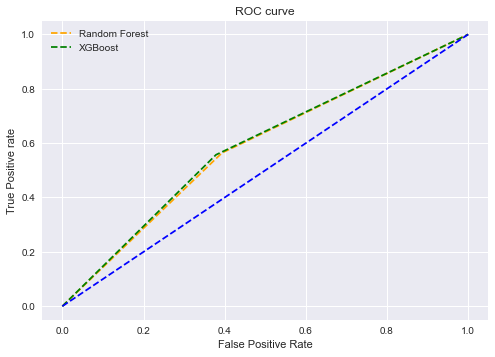

In [79]:
plt.style.use('seaborn-v0_8')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=model_name[0])
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=model_name[1])

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [89]:
stratified_shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
scores = cross_val_score(models['XGBoost'], X_train, y_train, cv=stratified_shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.56928 0.57256 0.5708  0.57016 0.57472]
Mean accuracy: 0.57


Confusion matrix:
 [[7757 4726]
 [5543 6974]]


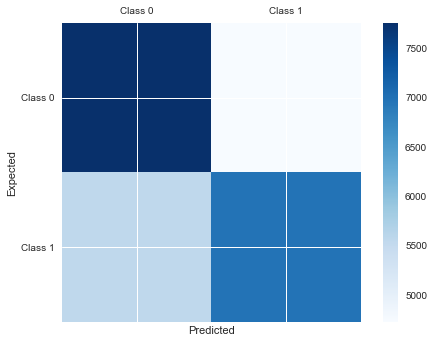

In [83]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=models['XGBoost'].predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [87]:
stratified_shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
scores = cross_val_score(models['Random Forest'], X_train, y_train, cv=stratified_shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.58216 0.57552 0.566   0.57984 0.57488]
Mean accuracy: 0.58


Confusion matrix:
 [[7573 4910]
 [5457 7060]]


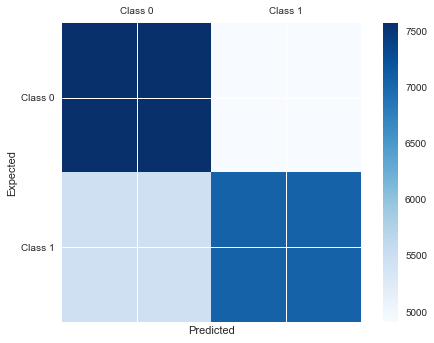

In [88]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=models['Random Forest'].predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()